In [140]:
# Importing useful libs
import numpy as np
import torch as th
import torch.nn as nn
import math
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
from tqdm import tqdm



In [105]:
# Reading data

train=pd.read_csv('train.csv',nrows=40000000,dtype={'acoustic_data':np.int16,'time_to_failure':np.float64})
train = train.to_numpy()


Text(0.5, 1.0, 'Time to failure and iterations')

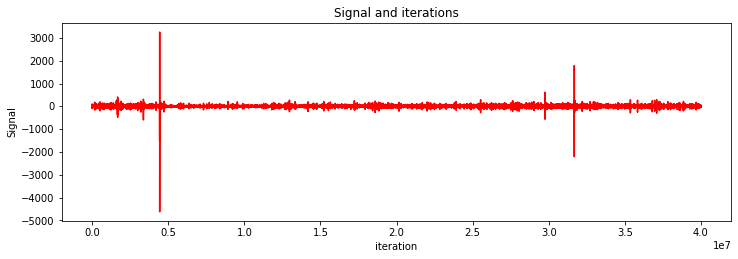

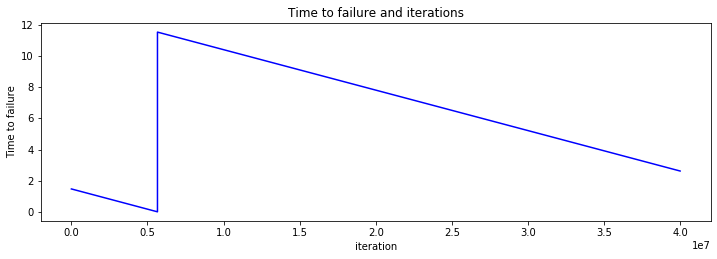

In [24]:
x_axis=np.linspace(0,40000000,40000000)

# plotting a part of the data

plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(x_axis,train[:,0], color='r')
plt.xlabel("iteration")
plt.ylabel("Signal")
plt.title("Signal and iterations")

plt.figure(figsize=(12,8))
plt.subplot(2,1,2)
plt.plot(x_axis,train[:,1], color='b')
plt.xlabel("iteration")
plt.ylabel("Time to failure")
plt.title("Time to failure and iterations")

[1.09999987e-09 1.10000031e-09 1.09999965e-09 1.10000031e-09
 1.09999987e-09 1.10000009e-09 1.09999987e-09 1.10000009e-09
 1.09999987e-09 1.10000009e-09 1.09999987e-09 1.10000009e-09
 1.10000009e-09 1.09999987e-09 1.10000031e-09 1.09999965e-09
 1.10000031e-09 1.09999987e-09 1.10000009e-09 1.09999987e-09]
1.100000002196566e-09


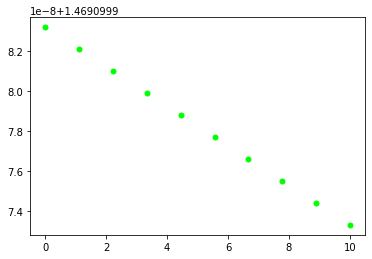

In [58]:
# Verifying the spacing between each subsequennts ttf data

plt.plot(np.linspace(0,10,10),train[0:10,1], linestyle = " ", marker = 'o', c = 'lime',  markersize = 5)
test=np.zeros(20)
for k in range(20):
    test[k]=train[k,1]-train[k+1,1]
mean_value=np.mean(test)
print(test)
print(mean_value)
# Between each point we have more or less 1.1ns of difference

The recording frequency is: 3.849750461333714 MHz


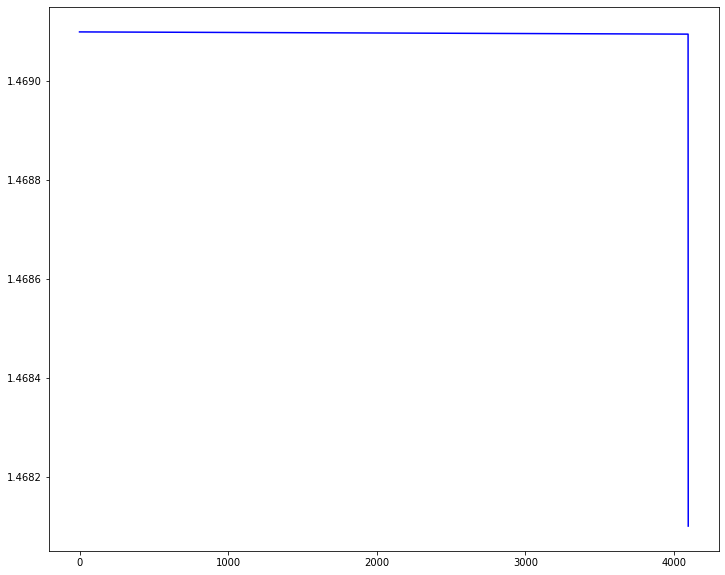

In [95]:
# Verifying the spacing between data in a broader spectrum
alfa=4096
plt.figure(figsize=(12,10))
plt.plot(np.linspace(0,alfa,alfa),train[0:alfa,1],color='b')

# We saw that we have a jump each 4096 points, let's calculate the mean value of this jump and calculate the frequency after
k=0
r=1000
for vrau in range(r):
    k=k-train[vrau*alfa-1,1]+train[vrau*alfa-2,1]

# Each 4096 points represents one bin recorded, the real frequency of recording is then

f=4096/(4096*1.1*10**(-9)+ k/(r-1))
print('The recording frequency is:',f/10**6,'MHz')


In [96]:
# Since our testing data is separated in MANY files and it has something around 150.000 signal points/file
# We must separate the training data in batches of more or less this size


In [108]:
def get_batch(train,seq_length,batch_size):
    # Length of our training vector
    n = train.shape[0] - 1
    # randomly choose the starting indices for the examples in the training batch
    idx = np.random.choice(n-seq_length, batch_size) #n-seq to do not exceed the size of train
    batch=[]
    for k in idx:                # runs through idx to capture each one of the indexes
        for i in range(seq_length):
            batch.append(train[k])
            k=k+1
    return batch


In [138]:
# Testing this shit here

train_new=train[1:30]
print(train_new)
print('############################')
get_batch(train_new,20,2)

[[ 6.          1.46909998]
 [ 8.          1.46909998]
 [ 5.          1.46909998]
 [ 8.          1.46909998]
 [ 8.          1.46909998]
 [ 9.          1.46909998]
 [ 7.          1.46909998]
 [-5.          1.46909997]
 [ 3.          1.46909997]
 [ 5.          1.46909997]
 [ 2.          1.46909997]
 [ 2.          1.46909997]
 [ 3.          1.46909997]
 [-1.          1.46909997]
 [ 5.          1.46909997]
 [ 6.          1.46909997]
 [ 4.          1.46909996]
 [ 3.          1.46909996]
 [ 5.          1.46909996]
 [ 4.          1.46909996]
 [ 2.          1.46909996]
 [ 6.          1.46909996]
 [ 7.          1.46909996]
 [ 7.          1.46909996]
 [ 8.          1.46909996]
 [14.          1.46909995]
 [ 9.          1.46909995]
 [ 4.          1.46909995]
 [ 7.          1.46909995]]
############################


[array([7.        , 1.46909998]),
 array([-5.        ,  1.46909997]),
 array([3.        , 1.46909997]),
 array([5.        , 1.46909997]),
 array([2.        , 1.46909997]),
 array([2.        , 1.46909997]),
 array([3.        , 1.46909997]),
 array([-1.        ,  1.46909997]),
 array([5.        , 1.46909997]),
 array([6.        , 1.46909997]),
 array([4.        , 1.46909996]),
 array([3.        , 1.46909996]),
 array([5.        , 1.46909996]),
 array([4.        , 1.46909996]),
 array([2.        , 1.46909996]),
 array([6.        , 1.46909996]),
 array([7.        , 1.46909996]),
 array([7.        , 1.46909996]),
 array([8.        , 1.46909996]),
 array([14.        ,  1.46909995]),
 array([6.        , 1.46909998]),
 array([8.        , 1.46909998]),
 array([5.        , 1.46909998]),
 array([8.        , 1.46909998]),
 array([8.        , 1.46909998]),
 array([9.        , 1.46909998]),
 array([7.        , 1.46909998]),
 array([-5.        ,  1.46909997]),
 array([3.        , 1.46909997]),
 array

In [ ]:
# It is also important read the TESTING dataset, let's do it here

# Getting inside of the folder
path=Path.cwd()
path=path/"test"
path
print("####################################")
tests=[]
# Appending each test term in the tests matrix
for i in path.iterdir():
    tests.append(i)  
# Testing to see if the data is really there  

tests[0]
test1=pd.read_csv(tests[1])
test1.head()
test1.shape

In [ ]:
plt.plot(test1.acoustic_data)

In [ ]:
# Let's define our model, since we want to predict a value we are not interested in classification, but mostly in
# performing a regression that will be well trained and will PREDICT the ttf
D_in = 1500
D_out= 1
model = nn.Sequential(nn.Linear(D_in,D_out),nn.LogSoftmax(dim=1))

loss_func = torch.nn.MSELoss()
